<a href="https://colab.research.google.com/github/yesong525h/HUFS-LAI-ML4E-2025-2/blob/assignment-5/submissions/202202605/assignment5/evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# evaluation.ipynb

# Colab 셀에 이 코드를 삽입하고 실행
from google.colab import drive
drive.mount('/content/drive')

# =========================================================
# 셀 1: 필수 라이브러리 설치 및 초기 설정
# =========================================================
!pip install transformers pandas scikit-learn seaborn matplotlib -q
# 한글 폰트 설치 (시각화 깨짐 방지)
!apt-get -qq install fonts-nanum

import pandas as pd
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from transformers import pipeline

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumBarunGothic'

MODEL_PATH = "./my_word_classifier"



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# evaluation.ipynb - 셀 2

# ... (이전 코드: 한글 폰트 설정, import) ...

# 모델 및 파일 경로 정의 (training.ipynb와 동일해야 함)
TEST_CSV_PATH = "/content/drive/MyDrive/Assignment5_Files/test.csv"
MODEL_PATH = "/content/drive/MyDrive/Assignment5_Files/my_word_classifier" # 모델 로드 경로

# 1. 시험지(Test Data) 가져오기
try:
    test_df = pd.read_csv(TEST_CSV_PATH) # 👈 파일 경로를 Drive 경로로 수정
    print(f"시험 문제 개수: {len(test_df)}개")

    # 2. 모델 불러오기
    device = 0 if torch.cuda.is_available() else -1
    classifier = pipeline("text-classification", model=MODEL_PATH, device=device) # 👈 모델 경로를 Drive 경로로 수정
    print(f"모델 로드 완료: {MODEL_PATH} (장치: {'GPU' if device == 0 else 'CPU'})")

except FileNotFoundError:
    print("🚨 오류: 파일을 Drive에서 찾을 수 없습니다. training.ipynb 실행 및 경로를 확인하세요.")

시험 문제 개수: 372개


Device set to use cpu


모델 로드 완료: /content/drive/MyDrive/Assignment5_Files/my_word_classifier (장치: CPU)


In [ ]:
# =========================================================
# 셀 3: 문제 풀기 (채점 실행)
# =========================================================
print("\n채점 중입니다... 잠시만 기다려주세요.")
predictions = []
true_labels = test_df['label'].tolist()

for word in test_df['word'].astype(str):
    # max_length 에러 방지를 위해 truncate=True 설정
    result = classifier(word, truncation=True, max_length=32)[0]
    pred_label = 1 if result['label'] == 'LABEL_1' else 0
    predictions.append(pred_label)



채점 중입니다... 잠시만 기다려주세요.


In [ ]:

# =========================================================
# 셀 4: 결과 발표 (성적표 출력)
# =========================================================
acc = accuracy_score(true_labels, predictions)
print(f"\n======== 💯 최종 성적표 ========")
print(f"정확도(Accuracy): {acc*100:.2f}%")
print("------------------------------")
print("상세 리포트:")
print(classification_report(true_labels, predictions, target_names=['모름(0)', '앎(1)']))




======== 💯 최종 성적표 ========
정확도(Accuracy): 77.69%
------------------------------
상세 리포트:
              precision    recall  f1-score   support

       모름(0)       0.58      0.59      0.59       100
        앎(1)       0.85      0.85      0.85       272

    accuracy                           0.78       372
   macro avg       0.72      0.72      0.72       372
weighted avg       0.78      0.78      0.78       372



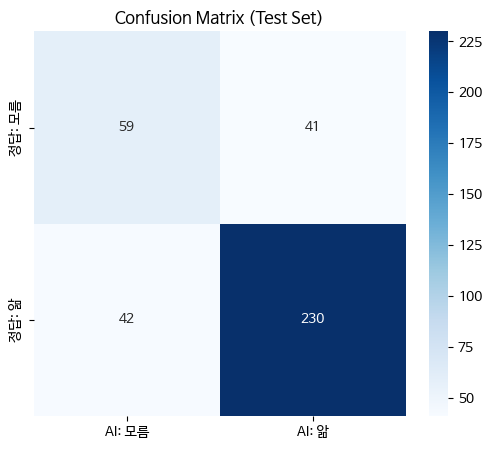

In [ ]:
# =========================================================
# 셀 5: 오답 노트 (Confusion Matrix) 시각화
# =========================================================
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['AI: 모름', 'AI: 앎'],
            yticklabels=['정답: 모름', '정답: 앎'])
plt.title("Confusion Matrix (Test Set)")
plt.show()